In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import psycopg2 as psy
import os 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import *
import sys
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor

%matplotlib inline

os.getcwd()

'/Users/HudsonCavanagh/GA_dsi-projects/capstone'

### In an ideal world, would need to go through this dataset and fix counties that have been renamed/ combined etc...

https://www.census.gov/geo/reference/county-changes.html

In [2]:
unemp_03_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/unemp_tot_03_14.csv')
unemp_03_14 = unemp_03_14.iloc[:,1:]

pov_county_year_03_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pov_county_year_03_14.csv')
pov_county_year_03_14 = pov_county_year_03_14.iloc[:,1:]

cdc_03_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/cdc_03_14.csv')
cdc_03_14 = cdc_03_14.iloc[:,2:]
cdc_03_14.head(12)

,County,County Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Hispanic Origin,Hispanic Origin Code,...,year,pct_total_deaths,deaths,population,crude_100k,county_id,state,county_code,CTYNAME,pop_merge_ind
0,"Jefferson County, AL",1073.0,15-24 years,15-24,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.027,11.0,19306.0,56.977106,1073,AL,1073,Jefferson County,Jefferson County_2014
1,"Jefferson County, AL",1073.0,25-34 years,25-34,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.039,16.0,23590.0,67.825350,1073,AL,1073,Jefferson County,Jefferson County_2014
2,"Jefferson County, AL",1073.0,25-34 years,25-34,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.065,27.0,22917.0,117.816468,1073,AL,1073,Jefferson County,Jefferson County_2014
3,"Jefferson County, AL",1073.0,35-44 years,35-44,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.053,22.0,20774.0,105.901608,1073,AL,1073,Jefferson County,Jefferson County_2014
4,"Jefferson County, AL",1073.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.063,26.0,21104.0,123.199393,1073,AL,1073,Jefferson County,Jefferson County_2014
5,"Jefferson County, AL",1073.0,45-54 years,45-54,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.046,19.0,23482.0,80.913040,1073,AL,1073,Jefferson County,Jefferson County_2014
6,"Jefferson County, AL",1073.0,45-54 years,45-54,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.078,32.0,22839.0,140.111213,1073,AL,1073,Jefferson County,Jefferson County_2014
7,"Jefferson County, AL",1073.0,55-64 years,55-64,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.029,12.0,25098.0,47.812575,1073,AL,1073,Jefferson County,Jefferson County_2014
8,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,Black or African American,2054-5,Not Hispanic or Latino,2186-2,...,2014,0.024,10.0,15872.0,63.004032,1073,AL,1073,Jefferson County,Jefferson County_2014
9,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.080,33.0,23237.0,142.014890,1073,AL,1073,Jefferson County,Jefferson County_2014


In [3]:
#adding up Jefferson County to see if its what I expect it to be
# 19306.0 + 23590.0 + 22917.0 + 20774.0 + 21104.0 + 23482.0 + 22839.0 + 25098.0 + 15872.0 + 23237.0 # = 218219.0
#this is only 1/3rd of what I expected

In [4]:
unemp_03_14.head()

,year,county_code,nan,working_pop,employed_pop,unemployed_pop,unemp_perc
0,2003,1001,NaN,22604.0,21462.0,1142.0,5.1
1,2003,1003,NaN,72299.0,68702.0,3597.0,5.0
2,2003,1005,NaN,10977.0,10196.0,781.0,7.1
3,2003,1007,NaN,8836.0,8309.0,527.0,6.0
4,2003,1009,NaN,25900.0,24702.0,1198.0,4.6


In [5]:
pop_03 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_03_output.csv')
pop_04 =pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_04_output.csv')
pop_05 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_05_output.csv')
pop_06 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_06_output.csv')
pop_07 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_07_output.csv')
pop_08 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_08_output.csv')
pop_09 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_09_output.csv')
pop_10_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_10_15_output.csv')


pop_10_14 = pop_10_14.loc[:,['year', 'county_code', 'pop_sub_15', 'pop_15-34', 'pop_35-54', 'pop_55+','pop_black','pop_white','pop_hisp','pop_asian', 'pop_male', 'population', 'TOT_POP']]
# pop_10_14.describe() 

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pop_10_14.head() # checked code 01005, Barbour county, listed is 2x actual
len(pop_10_14)

25136

In [7]:


pop_03_14 = pd.concat([pop_03, pop_04, pop_05, pop_06, pop_07, pop_08, pop_09, pop_10_14], axis=0) #this works 1) need to make floats 2) need more data
# pop_03_14.head(25) #25136 with axis =1
len(pop_03_14) #looks correct, moving on


47137

In [8]:
def pop_year_clean(year):
    year = str(year)
    year = year.replace(" ", "")
    try:
        year = int(year)
    except:
        year = year
    return year

pop_03_14['year'] = pop_03_14['year'].apply(lambda x: pop_year_clean(x)) #noticed 2013 was split into 2 groups
pop_03_14['year'].value_counts()
# len(pop_03_14)
# pop_03_15.isnull().sum()

2009                 3143
2008                 3143
2007                 3143
2006                 3143
2005                 3143
2004                 3143
2003                 3143
2010_census          3142
2010_pop_est_base    3142
2015                 3142
2014                 3142
2013                 3142
2012                 3142
2011                 3142
2010                 3142
Name: year, dtype: int64

In [9]:
pov_county_year_03_14['year'].value_counts()

2013    3195
2014    3194
2012    3194
2011    3194
2010    3194
2009    3193
2008    3192
2006    3192
2005    3192
2007    3191
2004    3191
2003    3191
Name: year, dtype: int64

### Issue with Population information

None of the population figures are around the order of magnitude I expected, which I believe owes to the previous groupby being summed, rather than averaged (which would have made more sense at the county level). Nonetheless, each column is consistent, so instead of proportional demographics, going to use ratio of demographics

-May be that in the calculations, should have been multiplying by 'POP_TOT'>
pop_03_14['pop_white'][pop_03_14['year']==2009].sum()  equals 54 billion ....


In [10]:
### Making ratios of existing columns

pop_03_14['pop_total_age'] = pop_03_14['pop_sub_15'] + pop_03_14['pop_15-34'] + pop_03_14['pop_35-54'] + pop_03_14['pop_55+']
pop_03_14['pop_sub_15_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_15-34_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_35-54_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_55+_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_big_3_races'] = pop_03_14['pop_black'] + pop_03_14['pop_white'] + pop_03_14['pop_asian']
pop_03_14['pop_asian_prop'] = pop_03_14['pop_asian']/pop_03_14['pop_big_3_races']
pop_03_14['pop_white_prop'] = pop_03_14['pop_white']/pop_03_14['pop_big_3_races']
pop_03_14['pop_black_prop'] = pop_03_14['pop_black']/pop_03_14['pop_big_3_races']
# pop_03_14['pop_hisp_prop'] = pop_03_14['pop_hisp']/pop_03_14['pop_big_3_races'] #don't have good relative comparison 
#excluded hispanic b/c does not pas eye-test
pop_03_14['pop_male_prop'] = pop_03_14['pop_male'] / pop_03_14['pop_total_age']


## Merging Fentanyl and Naxolone data here

2013-2014 baseline:
downloaded pdf

2009-2013 trends

http://www.deadiversion.usdoj.gov/nflis/spec_rpt_opioids_2014.pdf

2003-2008 trends

http://www.ncbi.nlm.nih.gov/core/lw/2.0/html/tileshop_pmc/tileshop_pmc_inline.html?title=Click%20on%20image%20to%20zoom&p=PMC3&id=3659213_OpenMed-06-e41-g001.jpg

In [11]:

fent_13_14 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/drug_seizures_year.csv')
fent_13_14 = fent_13_14.iloc[:,1:]
fent_13_14.columns = ['year', 'national_opiate_seizures', 'national_fentanyl_seizures']
#should i join this with the year before? don't want to leak information
fent_13_14.head()


,year,national_opiate_seizures,national_fentanyl_seizures
0,2003,187161.7159,467.239068
1,2004,195197.9065,487.300982
2,2005,205937.3319,514.111375
3,2006,216956.5005,541.620131
4,2007,229255.5545,572.324052


In [12]:
naxo = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/naxo_years_clean.csv')
naxo.columns = ['year', 'state', 'naxo_crim', 'naxo_civ', 'naxo_third']
naxo.head()

,year,state,naxo_crim,naxo_civ,naxo_third
0,2003,AK,0,0,0
1,2003,AL,0,0,0
2,2003,AR,0,0,0
3,2003,AZ,0,0,0
4,2003,CA,0,0,0


In [13]:
#grouping cdc data

deaths_pop = cdc_03_14.groupby(by=['year', 'county_code']).sum()

#calculating target

deaths_pop['death_per_head'] = deaths_pop['deaths'] / deaths_pop['population']
deaths_pop.reset_index(inplace=1)

#merging population
deaths_pop = pd.merge(deaths_pop, pop_03_14, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])
deaths_pop['population'] = deaths_pop['population_x']

#merging poverty

deaths_pop = pd.merge(deaths_pop, pov_county_year_03_14, how='left', left_on=['year','county_code'], right_on=['year','county_code'])


#merging unemployment

deaths_pop = pd.merge(deaths_pop, unemp_03_14, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])

# merging fentanyl

deaths_pop = pd.merge(deaths_pop, fent_13_14, how='left', left_on=['year'], right_on=['year'])




In [14]:
deaths_pop.head()#for testing


,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,pov_youth_count_0-17,pov_youth_rate_0-17,med_hh_income,nan,working_pop,employed_pop,unemployed_pop,unemp_perc,national_opiate_seizures,national_fentanyl_seizures
0,2003,1073,2146.0,26.0,54422.0,0.054,26.0,54422.0,95.427762,2146,...,31787.0,20.1,38305.0,NaN,321042.0,303282.0,17760.0,5.5,187161.7159,467.239068
1,2003,2020,4040.0,24.0,34160.0,0.049,24.0,34160.0,139.969440,4040,...,7998.0,10.4,55197.0,NaN,145428.0,136227.0,9201.0,6.3,187161.7159,467.239068
2,2003,4013,72234.0,591.0,1783462.0,1.212,591.0,1783462.0,715.153184,72234,...,177188.0,18.4,46376.0,NaN,1749197.0,1658323.0,90874.0,5.2,187161.7159,467.239068
3,2003,4019,36171.0,149.0,285630.0,0.308,149.0,285630.0,513.516478,36171,...,48407.0,21.7,37540.0,NaN,429349.0,406481.0,22868.0,5.3,187161.7159,467.239068
4,2003,4025,4025.0,10.0,11831.0,0.020,10.0,11831.0,84.523709,4025,...,7613.0,19.6,35303.0,NaN,85008.0,80664.0,4344.0,5.1,187161.7159,467.239068


### Merge Population, Population Growth Below

https://www.census.gov/popest/data/counties/totals/2015/files/CO-EST2015-alldata.csv
https://www.census.gov/popest/research/eval-estimates/CO-EST2010-ALLDATA.csv
https://www.census.gov/popest/data/counties/totals/2012/files/CO-EST2012-alldata.pdf -- summary of cols

In [15]:
def state_fix(code):
    code = str(code)
    if len(code) == 1:
        code = "0" + code
    return code

def county_fix(code):
    code = str(code)
    if len(code) == 1:
        code = "00" + code
    elif len(code) ==2:
        code = "0" + code
    return code

def col_includer(year, col):
    if year in col:
        return col
    else:
        return 0

def growth_convert(df, year):
    final_cols = []
    df_cols = df.columns
    last_year = str(year - 1)
    year = str(year)
    df_cols_this = df_cols.map(lambda x: col_includer(year, x))
    df_cols_last = df_cols.map(lambda x: col_includer(last_year, x))
    
    #cleaning this year col
    df_cols_this = pd.DataFrame(df_cols_this)
    df_cols_this = df_cols_this[df_cols_this[0]!=0]
    final_cols.append(df_cols_this.iloc[0,0])
    #pulling last year's columns
    df_cols_last = pd.DataFrame(df_cols_last)
    df_cols_last = df_cols_last[df_cols_last[0]!=0]
    final_cols.append(df_cols_last.iloc[1,0])
    final_cols.append(df_cols_last.iloc[12,0])
    final_cols.append(df_cols_last.iloc[13,0])
    final_cols.append(df_cols_last.iloc[14,0])
    final_cols.append('STATE')
    final_cols.append('COUNTY')
    df = df[final_cols]
    df['STATE'] = df['STATE'].apply(lambda x: state_fix(x))
    df['COUNTY'] = df['COUNTY'].apply(lambda x: county_fix(x))
    df['string_county_code'] = df['STATE'] + df['COUNTY']
    df['county_code'] = df['string_county_code'].apply(lambda x: int(x))
    df['year'] = int(year)
    df.columns = ['population_est', 'net_pop_change_raw','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'state_num', 'county_num', 'string_county_code', 'county_code', 'year']
    return df

pop_grow_10_14 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pop_dense_10_14.csv') #need to find where this file actually is
pop_grow_00_10 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pop_grow_00_10.csv') #need to find where this file actually is


#for 2011, need to do it in 2 parts
#first get 2011 pop estimate

pop_grow_11 = pop_grow_10_14
pop_grow_11['STATE'] = pop_grow_11['STATE'].apply(lambda x: state_fix(x))
pop_grow_11['COUNTY'] = pop_grow_11['COUNTY'].apply(lambda x: county_fix(x))
pop_grow_11['string_county_code'] = pop_grow_11['STATE'] + pop_grow_11['COUNTY']
pop_grow_11['county_code'] = pop_grow_11['string_county_code'].apply(lambda x: int(x))
pop_grow_11['year'] = 2011
pop_grow_11 = pop_grow_11[['POPESTIMATE2011', 'county_code', 'year']]
pop_grow_11.columns = ['population_est', 'county_code', 'year']

#second, get pop change in 2010
pop_grow_2010 = pop_grow_00_10
pop_grow_2010['year'] = 2011
pop_grow_2010['STATE'] = pop_grow_2010['STATE'].apply(lambda x: state_fix(x))
pop_grow_2010['COUNTY'] = pop_grow_2010['COUNTY'].apply(lambda x: county_fix(x))
pop_grow_2010['string_county_code'] = pop_grow_2010['STATE'] + pop_grow_2010['COUNTY']
pop_grow_2010['county_code'] = pop_grow_2010['string_county_code'].apply(lambda x: int(x))
pop_grow_2010 = pop_grow_2010[['year', 'county_code', 'NPOPCHG_2010','RNATURALINC2010','RINTERNATIONALMIG2010','RDOMESTICMIG2010']]
pop_grow_2010.columns = ['year', 'county_code', 'net_pop_change_raw', 'natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate']

#and merge
pop_grow_11 = pd.merge(pop_grow_11, pop_grow_2010, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])

#apply function to each year other than 2011 on two .csvs
growth_03 = growth_convert(pop_grow_00_10, 2003)
growth_04 = growth_convert(pop_grow_00_10, 2004)
growth_05 = growth_convert(pop_grow_00_10, 2005)
growth_06 = growth_convert(pop_grow_00_10, 2006)
growth_07 = growth_convert(pop_grow_00_10, 2007)
growth_08 = growth_convert(pop_grow_00_10, 2008)
growth_09 = growth_convert(pop_grow_00_10, 2009)
growth_10 = growth_convert(pop_grow_00_10, 2010)
# growth_11 = growth_convert(pop_grow_00_14, 2011) ## note this requires merging the two csvs because spans the difference
growth_12 = growth_convert(pop_grow_10_14, 2012)
growth_13 = growth_convert(pop_grow_10_14, 2013)
growth_14 = growth_convert(pop_grow_10_14, 2014)
#merge all population growth features
grow_03_14 = pd.concat([growth_03, growth_04, growth_05, growth_06, growth_07, growth_08, growth_09, growth_10, pop_grow_11, growth_12, growth_13, growth_14], axis=0)
#merge pop features to deaths_pop
deaths_pop = pd.merge(deaths_pop, grow_03_14, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])



/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

## Re-merging deaths to make sure no errors above



In [16]:
deaths_simple = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/deaths_simple.csv', delimiter='\t', encoding='utf-8')
#put last years alcohol
deaths_simple = deaths_simple.applymap(lambda x: str(x).replace(",", ""))

deaths_simple = deaths_simple[['County Code', 'Year', 'Deaths', 'Population', 'Crude Rate', 'Age Adjusted Rate']]

deaths_simple.columns = ['county_code', 'year', 'deaths_raw', 'cdc_population', 'death_rate_100k_cdc','death_rate_age_adjusted_cdc']


def yearify(year):
    year = float(year)
    try:
        return int(year)
    except:  
        return year
    
def interator(example):
    try:
        example = str(example).split('.')[0]
        return int(example)
    except:
        return example
    
def death_clean(death):
    try:
        return float(death)
    except:
        return np.nan


deaths_simple['year'] = deaths_simple['year'].apply(lambda x: yearify(x))
deaths_simple['county_code'] = deaths_simple['county_code'].apply(lambda x: yearify(x))
deaths_simple['deaths_raw'] = deaths_simple['deaths_raw'].apply(lambda x: death_clean(x))
deaths_simple['cdc_population'] = deaths_simple['cdc_population'].apply(lambda x: death_clean(x))
deaths_simple['death_rate_100k_cdc'] = deaths_simple['death_rate_100k_cdc'].apply(lambda x: death_clean(x))





### Adding alcohol related deaths FROM PRIOR YEAR as feature

In [17]:
#adding alcohol deaths as feature


# alcohol_deaths_simple = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/alcohol_deaths_simple.csv', delimiter='\t', encoding='utf-8')

# alcohol_deaths_simple = alcohol_deaths_simple.applymap(lambda x: str(x).replace(",", ""))

# alcohol_deaths_simple = alcohol_deaths_simple[['County Code', 'Year', 'Deaths', 'Crude Rate', 'Age Adjusted Rate']]

# alcohol_deaths_simple.columns = ['county_code', 'year', 'alc_deaths_raw_prior_yr', 'alc_death_rate_100k_cdc_prior_yr','alc_death_rate_age_adjusted_cdc_prior_yr']
# alcohol_deaths_simple['year'] = alcohol_deaths_simple['year'].apply(lambda x: yearify(x))
# alcohol_deaths_simple['year'] = alcohol_deaths_simple['year'] - 1 ### NOTE -- MERGING THIS FEATURE ONE YEAR DELAYED
# alcohol_deaths_simple['year'] = alcohol_deaths_simple['year'].apply(lambda x: interator(x))

# alcohol_deaths_simple['county_code'] = alcohol_deaths_simple['county_code'].apply(lambda x: interator(x))
# alcohol_deaths_simple['alc_deaths_raw_prior_yr'] = alcohol_deaths_simple['alc_deaths_raw_prior_yr'].apply(lambda x: death_clean(x))
# alcohol_deaths_simple['alc_death_rate_100k_cdc_prior_yr'] = alcohol_deaths_simple['alc_death_rate_100k_cdc_prior_yr'].apply(lambda x: death_clean(x))
# alcohol_deaths_simple['alc_death_rate_age_adjusted_cdc_prior_yr'] = alcohol_deaths_simple['alc_death_rate_age_adjusted_cdc_prior_yr'].apply(lambda x: death_clean(x))




In [18]:
deaths_pop = pd.merge(deaths_pop, deaths_simple, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])
# deaths_pop = pd.merge(deaths_pop, alcohol_deaths_simple, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])
#removed the above feature because would have forced me to drop ~ 344 rows




deaths_pop.dropna(axis=0, subset=['working_pop', 'employed_pop', 'deaths_raw', 'population_est'], inplace=1)


# deaths_pop.isnull().sum()


In [19]:
print(sum(deaths_pop['deaths']), sum(deaths_pop['deaths_raw'])) #close but they depart

(296604.0, 297418.0)


In [20]:
# # #calculations that required merge
deaths_pop['drug_death_rate_100k_cdc']  = deaths_pop['deaths_raw']/(deaths_pop['cdc_population']/100000)
deaths_pop['drug_death_rate_100k']  = deaths_pop['deaths_raw']/(deaths_pop['population_est']/100000) #accepting this as target
deaths_pop['perc_pop_employed'] = deaths_pop['employed_pop']/deaths_pop['population_est']
deaths_pop['unemp_rate'] = 1 - (deaths_pop['employed_pop']/deaths_pop['working_pop']) #this is good
deaths_pop['perc_pop_working'] = deaths_pop['working_pop']/deaths_pop['population_est']
deaths_pop['pov_rate'] = deaths_pop['pov_count_tot']/ deaths_pop['population_est']
deaths_pop['pov_rate_youth'] = deaths_pop['pov_youth_count_0-17']/ deaths_pop['population_est']
deaths_pop['pop_change_rate'] = deaths_pop['net_pop_change_raw'] / deaths_pop['population_est']
deaths_pop['constant'] = 1.0

deaths_pop.drop(1391, inplace=1)#noticed this is an outliar in plot below Coconino, AZ  pop listed as 1196.0
# deaths_pop[deaths_pop['county_code']==4005] 

In [21]:
deaths_pop['drug_death_rate_100k_diff_cdc_pop'] = deaths_pop['drug_death_rate_100k_cdc'] - deaths_pop['drug_death_rate_100k']

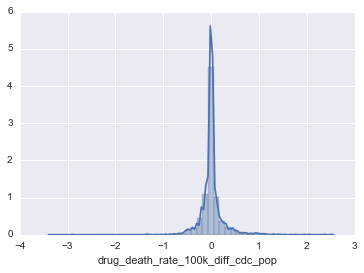

In [22]:
sns.distplot(deaths_pop['drug_death_rate_100k_diff_cdc_pop']) #basically even, no obvious bias

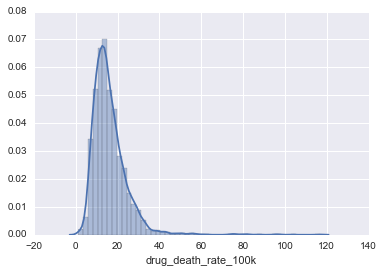

In [23]:
sns.distplot(deaths_pop['drug_death_rate_100k']) #basically even, no obvious bias

### Readding county names and state identities

In [24]:

def state_extract(county):
    county = str(county)
    try:
        county = county.split(",")[1]
        county = county.replace(" ", "")
        return county
    except: 
        if len(county) == 2:
            return county
        else:
            return "ERROR"
        

name_codes = cdc_03_14.loc[:,['county_code', 'County']] #grabbing this 
name_codes['county_code'] = name_codes['county_code'].apply(lambda x: int(x))
name_codes.index=name_codes['county_code']
name_codes = name_codes.iloc[:,1:]
name_codes = name_codes.to_dict()
name_codes = name_codes['County']


deaths_pop['county_name'] = deaths_pop['county_code'].apply(lambda x: name_codes[x])
deaths_pop['state'] = deaths_pop['county_name'].apply(lambda x: state_extract(x))
state_dums = pd.get_dummies(deaths_pop['state'])
state_feats = state_dums.columns

deaths_pop = pd.concat([deaths_pop,state_dums], axis = 1)



#merging naxolone policies

deaths_pop = pd.merge(deaths_pop, naxo, how='left', left_on=['year', 'state'], right_on=['year', 'state'])

# type(state_dums['AL'][2]) -- float

deaths_pop.dropna(axis=0, subset=['working_pop', 'employed_pop'], inplace=1)
# len(deaths_pop[deaths_pop['year']==2011])

# len(deaths_pop) #3104
# deaths_pop.isnull().sum()
deaths_pop.isnull().sum() # null issues are all with the population dataset


In [ ]:
deaths_pop.describe()

In [ ]:
deaths_pop['drug_death_rate_100k']
deaths_pop['drug_death_rate_100k'].describe() #new target variable

In [ ]:
sns.distplot(deaths_pop['drug_death_rate_100k'])

In [ ]:
hardest_hit = deaths_pop[['drug_death_rate_100k', 'year', 'county_name', 'deaths', 'population_est']].sort('drug_death_rate_100k')
# hardest_hit = sorted(deaths_pop[['death_rate_100k', 'year', 'county_name']][:-25], reverse=True)
# hardest_hit['year'].mean()
hardest_hit.tail(50)

In [ ]:
hardest_hit[hardest_hit['county_name']=='Rio Arriba County, NM'] #population is definitely wrong

In [ ]:

# hardest_hit['population'].head(50)

## Based on the prominence of "population" in the predictions (of a rate), going to remove the outliar populations with exceptionally low populations

y and X will be limited features

y_full and X_full will be full datatset

In [ ]:
print(deaths_pop['drug_death_rate_100k'][deaths_pop['population_est']<10000].mean(),
deaths_pop['drug_death_rate_100k'][deaths_pop['population_est']<5000].mean(),
deaths_pop['drug_death_rate_100k'][deaths_pop['population_est']<3000].mean()) 

# at 3k, dropping 14 samples
# at 5k 47 samples
# at 10k, 214 samples


#outliars are definitely in this range -- starting with 

In [ ]:
print(len(deaths_pop[deaths_pop['population_est']<10000]), len(deaths_pop))

In [ ]:
state_feats

In [ ]:
from sklearn.preprocessing import StandardScaler
#saving this so can re-run the analysis later with full features
deaths_pop_lim = deaths_pop[deaths_pop['population_est']>10000] # playing with this line to see how it effects model
deaths_pop_lim = deaths_pop_lim[deaths_pop_lim['population_est']<4000000]

deaths_pop.head()

In [ ]:
def floater(df):
    for col in df:
        try:
            col = col.apply(lambda x: float(x))
        except:
            continue
    return df
                

    
deaths_pop = floater(deaths_pop)
deaths_pop.head()

In [ ]:

deaths_pop['year'].apply(lambda x: str(x))
year_dums = pd.get_dummies(deaths_pop['year'])
deaths_pop = pd.concat([deaths_pop,year_dums], axis = 1) #not using these anymore in features


In [ ]:
deaths_pop.describe()



In [ ]:
## Adding auto-regressive features

#
deaths_pop = deaths_pop.sort_values(by=['county_code', 'year'])
deaths_pop['prior_year_death_rate_100k'] = deaths_pop['drug_death_rate_100k'].shift(1)
deaths_pop['pre_prior_year_death_rate_100k'] = deaths_pop['drug_death_rate_100k'].shift(2)
deaths_pop['prior_year_death_growth_rate'] = (deaths_pop['prior_year_death_rate_100k'] - deaths_pop['pre_prior_year_death_rate_100k'])/deaths_pop['pre_prior_year_death_rate_100k']
deaths_pop['three_back_year_death_rate_100k'] = deaths_pop['drug_death_rate_100k'].shift(3)
deaths_pop['two_year_period_death_growth_rate'] = (deaths_pop['prior_year_death_rate_100k'] - deaths_pop['three_back_year_death_rate_100k'])/ deaths_pop['three_back_year_death_rate_100k']
deaths_pop['two_three_year_death_growth_rate'] = (deaths_pop['pre_prior_year_death_rate_100k']-deaths_pop['three_back_year_death_rate_100k'])/ deaths_pop['three_back_year_death_rate_100k']
deaths_pop['years_since_14'] = 2014 - deaths_pop['year']


# deaths_pop[deaths_pop['prior_year_death_rate_100k'].isnull()==True]
deaths_pop.drop(886, inplace=1)
deaths_pop = deaths_pop.sort_index() #to undo sorting
death_df = deaths_pop  ## going to clean death_df below
from collections import defaultdict


death_df['count_county_code'] = np.nan
death_df.reset_index(inplace=1)

def dict_applier(df):
    dict_ex = defaultdict(lambda: 0)
    for i in range(len(df)):
        dict_ex[df['county_code'][i]] +=1
        df['count_county_code'][i] = dict_ex[df['county_code'][i]]
    return df

        
death_df = dict_applier(death_df)


# len(death_df[death_df['count_county_code']>4]) #1723
deaths_pop = death_df[death_df['count_county_code']>=4]




In [ ]:
len(death_df[death_df['count_county_code']>=4])

### Implementing Model Below

####

In [ ]:
median_drug_rate = np.median(deaths_pop['drug_death_rate_100k'])
avg_drug_rate = np.mean(deaths_pop['drug_death_rate_100k'])

y = deaths_pop['drug_death_rate_100k']

# v1 features = deaths_pop[['year','pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','pop_hisp_prop','population','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]
# v2 features, removed hisp, years, population below = deaths_pop[['pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','pop_hisp_prop','population','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]]

#when including population density, make sure to exclude outliars, esp Alaska


features = deaths_pop[['prior_year_death_rate_100k', 'pre_prior_year_death_rate_100k', 'prior_year_death_growth_rate','three_back_year_death_rate_100k', 'two_year_period_death_growth_rate', 'two_three_year_death_growth_rate', 'national_fentanyl_seizures', 'naxo_crim', 'naxo_civ', 'naxo_third', 'pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'population_est', 'pop_change_rate','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]


#8/25 added autoregressive features!!!

# '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'
features.to_csv('/Users/HudsonCavanagh/Dropbox/Capstone/csv_output/full_features_cdc_states_v6.csv')


In [ ]:
avg_drug_rate

In [ ]:
X = StandardScaler().fit_transform(features)
X = pd.DataFrame(X, columns=features.columns)

#PCA for later plots & model testing

pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
pca_4 = PCA(n_components=4)
xPC_2 = pca_2.fit_transform(X)
xPC_3 = pca_3.fit_transform(X)
xPC_4 = pca_4.fit_transform(X)

In [ ]:
death_df.head()

In [ ]:
death_df

## Implementing Tree Models, partially for feature importance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.cross_validation import StratifiedKFold, permutation_test_score
from sklearn.tree import DecisionTreeRegressor

stratk = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=66)


dt_simple = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=6, max_depth=6)
dt_simple.fit(X,y)
s_dt = cross_val_score(dt_simple, X, y, cv=stratk, n_jobs=-1)

print("Decision Tree", s_dt.mean())


In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
import seaborn as sns

rf = RandomForestRegressor()
rf_cv = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)
rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_test)
s_rf_cv = cross_val_score(rf_cv, X, y, cv=stratk, n_jobs=-1)
    
s_rf_cv.mean()

#real progress with the random forest -- lets see how it compares to bagging  (~.90)
#.755 with no population, pop growth features

In [ ]:
#BAGGING NOT WORKING

# bc_cv = BaggingRegressor(n_estimators=100)

# #X_scale = X_train     X_dums = Xd_train
# # bc.fit(X_train,y_train)
# s_bc = cross_val_score(bc_cv, X, y, cv=stratk, n_jobs=-1, scoring='f1')
# s_bc.mean()

# print("{} Score:\t{:0.3} ± {:0.3}".format("Bagging Trees", s_bc.mean(), s_bc.std()))


In [ ]:
# gs_rf = GridSearchCV(rf, {'min_samples_split': split_vals, 'max_depth': depths, 'max_features': max_feats}, cv=15)
# s_gs_rf_cv = cross_val_score(gs_rf, X, y, cv=stratk, n_jobs=-1)
# s_gs_rf_cv.mean()

## Looking at Feature Importance

In [ ]:
rel_feature_import = sorted(zip(rf.feature_importances_, features.columns), reverse=True)
rel_feature_import = pd.DataFrame(rel_feature_import)
rel_feature_import #pop was .74 before outliar removal

In [ ]:
#because population at the top, let's graph how it relates to mortality rate

sns.regplot(x='population_est', y='drug_death_rate_100k', data=deaths_pop) #some serious outliar action
#appears all the outliars are at very low populations

In [ ]:
sns.distplot(deaths_pop['population_est'])

Turns out, low population counties have dramatically higher mortality than larger population areas, (smaller than a million compared to bigger than a million)

In [ ]:
# print(deaths_pop['death_rate_100k'][deaths_pop['population']<100000].mean(), 
# deaths_pop['death_rate_100k'][deaths_pop['population']<10000].mean()) #these are dramatic outliars, lets take them out
#re-running this model with limited dataset
#less than 100k pop has higher mean than less than a million, less than 10k has highest likelihood

In [ ]:
# deaths_pop['county_code'][deaths_pop['population']<1000000].value_counts()
# deaths_pop[deaths_pop['county_code']==26025] #2009 seems to have an error - looks like deaths and pop for 2008 & 2009 pooled
# deaths_pop[deaths_pop['county_code']==53015] #no issues
# deaths_pop[deaths_pop['county_code']==47093] #no issues
# deaths_pop[deaths_pop['county_code']==41005] #no issues

#lead by Calhoun County, Michigan (26025) but looks like issues with 2009

s_rf_cv.mean()

In [ ]:
sns.regplot(ypred_rf, y_test)

## Implementing Kaggle-Darling XG Boost 

In [ ]:
import xgboost

# fit model no training data
xg_model = xgboost.XGBRegressor()
xg_model_cv = xgboost.XGBRegressor()
xg_model.fit(X_train, y_train)

s_xg_cv = cross_val_score(xg_model_cv, X, y, cv=stratk, n_jobs=-1)

# make predictions for test data
y_pred_xg = xg_model.predict(X_test)
s_xg_cv.mean()

In [ ]:
sns.regplot(y_pred_xg, y_test)

### Implementing GradientBoosting Regressor to see if this is diff from XG Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_tree = GradientBoostingRegressor(n_estimators=1000)
gb_tree_cv = GradientBoostingRegressor(n_estimators=1000, max_depth=10)

gb_tree.fit(X_train, y_train)
ypred_gbtree = gb_tree.predict(X_test)


s_gb_tree_cv = cross_val_score(gb_tree_cv, X, y, cv=stratk, n_jobs=-1)
s_gb_tree_cv.mean()



In [ ]:
sns.regplot(ypred_gbtree, y_test, color="orange")
plt.xlabel('Predicted Mortality Rate (Gradient Boosted)')
plt.ylabel('Actual Mortality Rate')
plt.show()

In [ ]:
### Quick visualization t-SNE 
### Also want to do some classification with DB Scan

In [ ]:
import datetime
from tsne import bh_sne
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
# t0 = datetime.time()
# X_tsne = tsne.fit_transform(features)


X_2d = bh_sne(X)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 10))
plt.scatter(X_2d[:,0],X_2d[:,1])
plt.title('t-SNE')
plt.xlabel('')
plt.ylabel('')


plt.show()

## Training a bunch more models to see if any improvements 

In [ ]:
# ada_tree_scale = AdaBoostClassifier(n_estimators=100)
# gb_tree_scale = GradientBoostingClassifier(n_estimators=100)
# ada_rand_forest_scale = AdaBoostClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=1000), n_estimators=100)
# # gb_rand_forest_scale = GradientBoostingClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=1000), n_estimators=100)
# bc_rand_forest_scale = BaggingClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=100), n_estimators=100) #.973  - .98 after
# bc_knn = BaggingClassifier(KNeighborsClassifier(), n_estimators=1000) #.973  - .98 after


## Exploring Outcomes

In [ ]:
# deaths_pop[['county_name', 'year', 'deaths']][deaths_pop['drug_death_rate_100k']>200][deaths_pop['population']>10000]

## Summarizing info from the above

a rate of 200 means that in any given year, 0.2% of the population (or 1 in every 500 people) died in any given year from a drug-related cause. Such a rate occured only once prior to 2010 and 12 times since then. 

-- deep issues in the appalacia area


### Moving into clustering/ unsupervised methods & visualization

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score


db1 = DBSCAN(eps = 4, min_samples = 15).fit(X)  
db1labels = db1.labels_  
core_samples = db1.core_sample_indices_

print("Silhouette Coefficient: %0.3f" 
      % silhouette_score(X, db1labels), len(set(db1labels)), db1labels.mean())

In [ ]:
db2 = DBSCAN(eps = 10, min_samples = 15).fit(X)  
db2labels = db2.labels_  
core_samples = db2.core_sample_indices_

# db2labels 
print("Silhouette Coefficient: %0.3f" 
      % silhouette_score(X, db1labels), len(set(db2labels)), db2labels.mean())

In [ ]:
# df_pca_2['cluster'] = pd.Series(clusters_pca.labels_)
plt.style.use('fivethirtyeight')
xPC_2 = pd.DataFrame(xPC_2, columns=['pc1', 'pc2'])
xPC_2.head()

In [ ]:
plt.style.use('fivethirtyeight')
xPC_2 = pd.DataFrame(xPC_2, columns=['pc1', 'pc2'])
xPC_2.head()

graph = xPC_2.plot(kind='scatter', x='pc1', y='pc2', figsize=(16,8))

for i, county in enumerate(deaths_pop['county_name']):
    graph.annotate(county, (xPC_2.iloc[i,0], xPC_2.iloc[i,1]))

### Implementing Classification Model

In [ ]:
median_drug_rate

In [ ]:
y_bin = y.apply(lambda x: 1 if x > median_drug_rate else 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

rf_c_cv = RandomForestClassifier()


s_rf_cv = cross_val_score(rf_c_cv, X, y_bin, cv=stratk, n_jobs=-1)
    
s_rf_cv.mean()

In [ ]:
xg_class_model_cv = xgboost.XGBClassifier()

s_xg_cv = cross_val_score(xg_class_model_cv, X, y_bin, cv=stratk, n_jobs=-1)

s_xg_cv.mean()

## Next Steps

#### Need to go back to summary statistics extracted and make sure trends found here agree to those findings
#### Need to explore why population figures are so distorted
- go through from beginning and just follow that column
#### Look for further features to add:
- population density
- policy features
- 

In [ ]:
state_change = pd.pivot_table(deaths_pop, values=['drug_death_rate_100k'], index=['state', 'year'], aggfunc='mean')
state_average = pd.pivot_table(deaths_pop, values=['drug_death_rate_100k'], index=['state'], aggfunc='mean')

year_average = pd.pivot_table(deaths_pop, values=['drug_death_rate_100k'], index=['year'], aggfunc='mean')
# death_rate_pivot =pd.pivot_table(cdc_99_14, values=['crude_100k'], index=['County','year'], aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
state_average.reset_index(inplace=1)

sns.barplot(data = state_average, y='drug_death_rate_100k', x='state')
# state_average['delta'] = state_average['delta']

In [ ]:
year_average.reset_index(inplace=1)
sns.regplot(data = year_average, y='drug_death_rate_100k', x='year')


In [ ]:
ypred_gbtree = pd.DataFrame(ypred_gbtree)
y_test = pd.DataFrame(y_test)
pred_act_diff = y_test.merge(deaths_pop, how='left', left_index=1, right_index=1)
pred_act_diff['death_rate_actual_ytest'] = pred_act_diff['drug_death_rate_100k_x']
pred_act_diff = pred_act_diff.merge(ypred_gbtree, how='left', left_index=1, right_index=1)
pred_act_diff['death_rate_pred_gb'] = pred_act_diff[0]
pred_act_diff = pred_act_diff[pred_act_diff['death_rate_pred_gb'].isnull()==False]
# deaths_pop = pd.merge(deaths_pop, pop_03_14, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])
# pred_act_diff['predicted_gb'] = pred_act_diff[0]
# pred_act_diff['residual'] = pred_act_diff['death_rate_100k'] - pred_act_diff['predicted_gb']
pred_act_diff['residual'] = pred_act_diff['death_rate_pred_gb'] - pred_act_diff['death_rate_actual_ytest']

#note positive means that actual > predicted
pred_act_diff[['residual', 'death_rate_pred_gb', 'death_rate_actual_ytest', 'county_name', 'year']]


In [ ]:
predict_eval = pred_act_diff[['residual', 'death_rate_pred_gb', 'death_rate_actual_ytest', 'county_name', 'year']].sort('residual')
predict_eval.head(5)

In [ ]:
predict_eval.tail(5)

#the counties that appear here

# Proceeding to predict 2014

In [ ]:
input_2013 = deaths_pop[deaths_pop['year']<2014]
input_2013.reset_index(inplace=1) # added this 8/23 to alleviate nans below
test_2014 = deaths_pop[deaths_pop['year']==2014]
test_2014.reset_index(inplace=1) # added this 8/23 to alleviate nans below

#creating regression training
y_03_13 = input_2013['drug_death_rate_100k']

#regression target
y_14 = test_2014['drug_death_rate_100k']

#creating classification (bigger/ smaller) train & target
y_delta_bin_03_13 = (input_2013['drug_death_rate_100k']-input_2013['prior_year_death_rate_100k']).apply(lambda x: 1 if x >= 0 else 0) #one means increase
y_delta_bin_14 = (test_2014['drug_death_rate_100k']-test_2014['prior_year_death_rate_100k']).apply(lambda x: 1 if x >= 0 else 0) #one means increase

#creating regression train & target for drug rate growth
y_delta_grow_03_13 = ((input_2013['drug_death_rate_100k']-input_2013['prior_year_death_rate_100k'])/input_2013['prior_year_death_rate_100k']) 
y_delta_grow_14 = ((test_2014['drug_death_rate_100k']-test_2014['prior_year_death_rate_100k'])/test_2014['prior_year_death_rate_100k']) 


#8/22 added prior year death rate as feature 
, 
features_03_13 = input_2013[['prior_year_death_rate_100k','pre_prior_year_death_rate_100k', 'prior_year_death_growth_rate','three_back_year_death_rate_100k', 'two_year_period_death_growth_rate', 'two_three_year_death_growth_rate', 'national_fentanyl_seizures','naxo_crim', 'naxo_civ', 'naxo_third', 'pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'population_est', 'pop_change_rate','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]
features_14 = test_2014[['prior_year_death_rate_100k','pre_prior_year_death_rate_100k', 'prior_year_death_growth_rate','three_back_year_death_rate_100k', 'two_year_period_death_growth_rate', 'two_three_year_death_growth_rate','national_fentanyl_seizures','naxo_crim', 'naxo_civ', 'naxo_third', 'pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'population_est', 'pop_change_rate','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]
X_03_13 = StandardScaler().fit_transform(features_03_13)
X_03_13 = pd.DataFrame(X_03_13, columns=features_03_13.columns)

X_14 = StandardScaler().fit_transform(features_14)
X_14 = pd.DataFrame(X_14, columns=features_14.columns)

gb_14 = GradientBoostingRegressor(n_estimators=1000, max_depth=10)

gb_14.fit(X_03_13, y_03_13)
ypred_14 = gb_14.predict(X_14)


from sklearn.metrics import r2_score
r2_score(y_14, ypred_14)

#.6075 before fent feature

In [ ]:
ax = sns.regplot(y_14, ypred_14)
ax.set_ylabel('Predicted Mortality Rate (2014)')
ax.set_title('Observed Mortality Rate (2014)')

In [ ]:
ypred_14 = pd.DataFrame(ypred_14)
eval_preds = pd.merge(test_2014, ypred_14, left_index=1, right_index=1)
eval_preds['model_prediction']= eval_preds[0]
rio = eval_preds[['model_prediction', 'drug_death_rate_100k', 'prior_year_death_rate_100k', 'pre_prior_year_death_rate_100k', 'three_back_year_death_rate_100k']][eval_preds['county_code']==35039].round(2)
rio.columns = ['2014 Prediction', '2014 Observed', '2013 Observed', '2012 Observed', '2011 Observed']
rio.index = ['Rio Arriba, New Mexico']
rio

In [ ]:
# ax2=sns.regplot(ypred_gbtree, y_test, color="orange")
# ax2.xlabel('Predicted Mortality Rate (Gradient Boosted)')
# ax2.ylabel('Actual Mortality Rate')


In [ ]:
logreg_basic = LogisticRegression(solver='liblinear')
logreg_basic.fit(X_03_13, y_delta_bin_03_13)
y_bin_preds_log = logreg_basic.predict(X_14)

logreg_basic.coef_[0]

# X_03_13_ = pd.merge(X_03_13_mod, state_features_train, how='left', left_index=1, right_index=1)

coefs_variables = pd.DataFrame(zip(logreg_basic.coef_[0], X_03_13.columns))
coefs_variables.columns = ['coef', 'feature']
coefs_variables['abs_coef'] = abs(coefs_variables['coef'])
coefs_variables = coefs_variables.sort_values(by='abs_coef', ascending=0)
coefs_variables

In [ ]:
coefs_variables.head(40)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

logreg = LogisticRegression(solver='liblinear')
C_vals = [0.01, 0.1, .25, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=15)
gs.fit(X_03_13, y_delta_bin_03_13)
y_bin_preds_gs_logis = gs.predict(X_14)

# gs.best_params

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_basic_cm = confusion_matrix(y_delta_bin_14, y_bin_preds_gs_logis)
lr_basic_cm_df = pd.DataFrame(lr_basic_cm)
print(lr_basic_cm_df)

In [ ]:
# np.corr(pred_act_diff_14['death_rate_pred_14'],pred_act_diff_14['death_rate_100k_observed'])

In [ ]:
median_drug_rate

## How accurately can we classify communities as compared to the median rate?

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

y_bin_03_13 = y_03_13.apply(lambda x: 1 if x > median_drug_rate else 0)
y_bin_14_obs = y_14.apply(lambda x: 1 if x > median_drug_rate else 0)


xg_class_model_14 = xgboost.XGBClassifier()
xg_class_model_14.fit(X_03_13, y_bin_03_13)
y_class_14 = xg_class_model_14.predict(X_14)

xg_14_cm = confusion_matrix(y_bin_14_obs, y_class_14, labels=xg_class_model_14.classes_)
# xg_14_cm = pd.DataFrame(xg_14_cm, columns=xg_class_model_14.classes_, index=xg_class_model_14.classes_) 


feat_import_XG_class_14 = pd.Series(zip(X_03_13, xg_class_model_14.feature_importances_))

feat_import_XG_class_14

#Using tree-based feature importance to reduce my features -- predicting against median

xg_class_model_14_select = SelectFromModel(xg_class_model_14, prefit=True)
X_03_13_new = xg_class_model_14_select.transform(X_03_13)
X_14_new = xg_class_model_14_select.transform(X_14)


xg_class_model_14_mod = xgboost.XGBClassifier()
xg_class_model_14_mod.fit(X_03_13_new, y_bin_03_13)
y_class_xg_14_mod = xg_class_model_14_mod.predict(X_14_new)
xg_14_mod_cm = confusion_matrix(y_class_xg_14_mod, y_bin_14_obs, labels=xg_class_model_14.classes_)


print('f1:', sklearn.metrics.f1_score(y_bin_14_obs,y_class_xg_14_mod),
'accuracy:', accuracy_score(y_bin_14_obs,y_class_xg_14_mod))

In [ ]:
import matplotlib.patheffects as path_effects

def plot_confusion_matrix(cm, title='Confusion matrix', labels=['Decreasing','Increasing'], cmap=plt.cm.Blues):
   
   plt.figure(figsize=(7,7))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   
   tick_marks = np.arange(2)
   plt.xticks(tick_marks, labels)
   plt.yticks(tick_marks, labels)
       
   plt.title(title)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
   plt.colorbar()
   plt.tight_layout()
   
   width, height = cm.shape
   
   for x in xrange(width):
       for y in xrange(height):
           plt.annotate(str(cm[x][y]), xy=(y, x), 
                       horizontalalignment='center',
                       verticalalignment='center',
                       color = 'white',
                       fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                      path_effects.Normal()]) #The last line here adds a text outline
        
plot_confusion_matrix(xg_14_mod_cm)



In [ ]:
print('f1:', sklearn.metrics.f1_score(y_bin_14_obs,y_class_14),
'accuracy:', accuracy_score(y_bin_14_obs,y_class_14))

#predicting against the median

In [ ]:
y_delta_bin_03_13

### How accurately can we predict the directional movement of communities in 2014, e.g. can our model predict which communties were going to get worse in 2014? 

In [ ]:
pd.Series(y_delta_bin_14).value_counts()

In [ ]:
xg_delta_model_14 = xgboost.XGBClassifier()
xg_delta_model_14.fit(X_03_13, y_delta_bin_03_13)
y_delta_14_pred = xg_delta_model_14.predict(X_14)

xg_delta_14_cm = confusion_matrix(y_delta_bin_14, y_delta_14_pred)
# xg_14_cm = pd.DataFrame(xg_14_cm, columns=xg_class_model_14.classes_, index=xg_class_model_14.classes_) 
plot_confusion_matrix(xg_delta_14_cm)


In [ ]:
pd.Series(y_delta_14_pred).value_counts()

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# np.set_printoptions(precision=2)
# print('Confusion matrix, without normalization')
# print(cm)
# plt.figure()
# plot_confusion_matrix(cm)

# # Normalize the confusion matrix by row (i.e by the number of samples
# # in each class)
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# print('Normalized confusion matrix')
# print(cm_normalized)
# plt.figure()
# plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [ ]:
# y_delta_bin_14_inv = y_delta_bin_14.apply(lambda x: 0 if x==1 else 1)
# xg_delta_14_inv_cm = confusion_matrix(y_delta_14_pred, y_delta_bin_14_inv)
# plot_confusion_matrix(xg_delta_14_inv_cm)

In [ ]:
print('f1:', sklearn.metrics.f1_score(y_delta_bin_14, y_delta_14_pred),
'accuracy:', accuracy_score(y_delta_bin_14, y_delta_14_pred))

#marginally better than random guessing!!!

In [ ]:
xg_delta_model_14_select = SelectFromModel(xg_delta_model_14, prefit=True)
X_03_13_new_delta = xg_delta_model_14_select.transform(X_03_13)
X_14_new_delta = xg_delta_model_14_select.transform(X_14)


xg_delta_model_14_mod = xgboost.XGBClassifier()
xg_delta_model_14_mod.fit(X_03_13_new_delta, y_delta_bin_03_13)
y_delta_xg_14_mod = xg_delta_model_14_mod.predict(X_14_new_delta)
xg_14_mod_cm = confusion_matrix(y_delta_bin_14, y_class_xg_14_mod, labels=xg_class_model_14.classes_)


print('f1:', sklearn.metrics.f1_score(y_delta_bin_14,y_class_xg_14_mod),
'accuracy:', accuracy_score(y_delta_bin_14,y_class_xg_14_mod))

In [ ]:
len(y_delta_bin_14)

naive_guesses = y_delta_bin_14.apply(lambda x: 1)
print('f1:', sklearn.metrics.f1_score(y_delta_bin_14, naive_guesses),
'accuracy:', accuracy_score(y_delta_bin_14, naive_guesses))


#this shows my model truely cannot beat guessing "worse" every time

In [ ]:
print("model auc score:", sklearn.metrics.roc_auc_score(y_delta_bin_14, y_delta_14_pred),
      "naive auc score:", sklearn.metrics.roc_auc_score(y_delta_bin_14, naive_guesses))

## Model defeated naive guessing! Horray!

- return and plot AUC curve, set threshold

In [ ]:
naive_guesses2 = naive_guesses.apply(lambda x: 0 if x==1 else 1)

In [ ]:
xg_bin_delta_14_cm = confusion_matrix(y_delta_bin_14, naive_guesses)

plot_confusion_matrix(xg_bin_delta_14_cm)

In [ ]:
ax3 = sns.regplot(deaths_pop['drug_death_rate_100k'], deaths_pop['population_est'])

ax3.set_ylabel('Observed Mortality Rate')
ax3.set_xlabel('Size of Population')
ax3.set_title('Population and Mortality Rates')

In [ ]:
ax4 = sns.regplot(deaths_pop['prior_year_death_rate_100k'], deaths_pop['drug_death_rate_100k'])

ax4.set_ylabel('Current Year Mortality Rate')
ax4.set_xlabel('Previous Year Mortality Rate')
ax4.set_title('Fluctuation in Mortality Over Time')


# 'prior_year_death_rate_100k','pre_prior_year_death_rate_100k'

In [ ]:
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_03_13, y_delta_bin_03_13)
nb_ypreds_14 = gnb.predict(X_14)

print('f1:', sklearn.metrics.f1_score(y_delta_bin_14, nb_ypreds_14),
'accuracy:', accuracy_score(y_delta_bin_14, nb_ypreds_14))

In [ ]:
y_delta_bin_14.mean() #nope, baseline is .64, meaning the model does worse than simply guessing every county will get worse...

In [ ]:
# y_delta_grow_03_13 
# y_delta_grow_14 
from sklearn.metrics import r2_score

gb_delta_14 = GradientBoostingRegressor(n_estimators=1000)

gb_delta_14.fit(X_03_13, y_delta_grow_03_13)
gb_delta_14_ypred = gb_delta_14.predict(X_14)

sns.regplot(y_delta_grow_14, gb_delta_14_ypred)


r2_score(y_delta_grow_14, gb_delta_14_ypred)


In [ ]:
y_delta_grow_14.describe()

In [ ]:
print(y_delta_grow_14.mean(), gb_delta_14_ypred.mean())

In [ ]:
gb_delta_model_14_select = SelectFromModel(gb_delta_14, prefit=True)
X_03_13_new_delta_gb = gb_delta_model_14_select.transform(X_03_13)
X_14_new_delta_gb = gb_delta_model_14_select.transform(X_14)

#lets try this with both the features from X_03_13_new_delta_gb and X_03_13_new_delta (same for test)


gb_delta_model_14_mod = xgboost.XGBClassifier()
gb_delta_model_14_mod.fit(X_03_13_new_delta_gb, y_delta_bin_03_13)
y_delta_gb_14_mod = gb_delta_model_14_mod.predict(X_14_new_delta_gb)
# gb_14_mod_cm = confusion_matrix(y_delta_grow_14, y_delta_gb_14_mod, labels=xg_class_model_14.classes_)

r2_score(y_delta_grow_14, y_delta_gb_14_mod)


In [ ]:
gb_delta_model_14_xg_feats = xgboost.XGBClassifier()
gb_delta_model_14_xg_feats.fit(X_03_13_new_delta, y_delta_bin_03_13)
y_delta_gb_14_xg_feats = gb_delta_model_14_xg_feats.predict(X_14_new_delta)
# gb_14_mod_cm = confusion_matrix(y_delta_grow_14, y_delta_gb_14_mod, labels=xg_class_model_14.classes_)

r2_score(y_delta_grow_14, y_delta_gb_14_xg_feats)


In [ ]:
sklearn.metrics.f1_score(y_delta_gb_14_xg_feats, y_delta_bin_14)


In [ ]:
# r2_score(y_delta_gb_14_mod, y_delta_grow_14)


print('f1:', sklearn.metrics.f1_score(y_delta_bin_14, y_delta_gb_14_mod),
'accuracy:', accuracy_score(y_delta_bin_14, y_delta_gb_14_mod))

## Unscaling prior_year_death_rate to see what happens

In [ ]:
# features_03_13_mod = input_2013[['pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'population_est', 'pop_change_rate','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'constant']]
# features_03_13_mod.isnull().sum()
# state_features_train = input_2013[['AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]
# state_features_train.isnull().sum()
# state_features_test = test_2014[['AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]
# state_features_test.isnull().sum()
# features_14_mod = test_2014[['pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'population_est', 'pop_change_rate','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'constant']]
# features_14_mod.isnull().sum()
# prior_year_train = pd.DataFrame(input_2013['prior_year_death_rate_100k'])
# prior_year_train.isnull().sum()
# prior_year_test = pd.DataFrame(test_2014['prior_year_death_rate_100k'])
# prior_year_test.isnull().sum()

In [ ]:
features_03_13_mod = input_2013[['prior_year_death_rate_100k','pre_prior_year_death_rate_100k', 'prior_year_death_growth_rate','three_back_year_death_rate_100k', 'two_year_period_death_growth_rate', 'two_three_year_death_growth_rate','pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'population_est', 'pop_change_rate','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'constant']]

state_features_train = input_2013[['AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]
state_features_test = test_2014[['AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]


features_14_mod = test_2014[['prior_year_death_rate_100k','pre_prior_year_death_rate_100k', 'prior_year_death_growth_rate','three_back_year_death_rate_100k', 'two_year_period_death_growth_rate', 'two_three_year_death_growth_rate', 'pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'population_est', 'pop_change_rate','natural_pop_growth_rate', 'intl_migrate_rate', 'dom_migrate_rate', 'constant']]

X_03_13_mod = StandardScaler().fit_transform(features_03_13_mod)
X_03_13_mod = pd.DataFrame(X_03_13_mod, columns=features_03_13_mod.columns)

print(X_03_13_mod.isnull().sum().sum())

X_14_mod = StandardScaler().fit_transform(features_14_mod)
X_14_mod = pd.DataFrame(X_14_mod, columns=features_14_mod.columns)


X_03_13_mod = pd.merge(X_03_13_mod, state_features_train, how='left', left_index=1, right_index=1)
print(X_03_13_mod.isnull().sum().sum())

X_14_mod = pd.merge(X_14_mod, state_features_test, how='left', left_index=1, right_index=1)


In [ ]:

gb_delta_14_mod = GradientBoostingRegressor(n_estimators=10000, learning_rate=.02)


gb_delta_14_mod.fit(X_03_13_mod, y_delta_grow_03_13) # works
gb_delta_14_ypred_mod = gb_delta_14.predict(X_14_mod)

# sns.regplot(y_delta_grow_14, gb_delta_14_ypred_mod)

r2_score(gb_delta_14_ypred_mod, y_delta_grow_14)

In [ ]:
gb_delta_14_ypred = pd.DataFrame(gb_delta_14_ypred)

worst_off_2014 = pd.merge(test_2014, gb_delta_14_ypred, how='left', left_index=1, right_index=1)
worst_off_2014.head()

In [ ]:
# this code work, yielded:
# {'max_depth': 2,
#  'max_features': 'auto',
#  'min_samples_leaf': 5,
#  'min_samples_split': 5}    


# max_feature_list = ['auto']
# param_test = {'max_depth':[2,5], 'max_features':max_feature_list, 'min_samples_split':[2,5], 'min_samples_leaf':[2,5]}

# gb_delta_14_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=.1)
# gb_delta_14_class = GradientBoostingClassifier(n_estimators=10000, learning_rate=.02)

# gs_delta_14_reg = GridSearchCV(gb_delta_14_reg, param_test, verbose=False, cv=15)
# gs_delta_14_reg.fit(X_03_13_mod, y_delta_grow_03_13)
# y_delta_14_gs_preds = gs_delta_14_reg.predict(X_14_mod)


# gs_delta_14_reg.best_params_

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


max_feature_list = ['auto', 'sqrt']
param_test = {'max_depth':range(3,15,2), 'max_features':max_feature_list, 'min_samples_split':range(3,15), 'min_samples_leaf':range(2,8)}

gb_delta_14_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=.05)
gb_delta_14_class = GradientBoostingClassifier(n_estimators=1000, learning_rate=.05)

gs_delta_14_reg = GridSearchCV(gb_delta_14_reg, param_test, verbose=False, cv=15)
gs_delta_14_reg.fit(X_03_13_mod, y_delta_grow_03_13)
y_delta_14_gs_preds = gs_delta_14_reg.predict(X_14_mod)


gs_delta_14_reg.best_params_
# loss : {‘ls’, ‘lad’, ‘huber’}
# learning_rate : float, optional (default=0.1)
# n_estimators int (default=100)
# max_depth : integer, optional (default=3)
# min_samples_split : integer, optional (default=2)
# max_features = "auto" or "sqrt"

In [ ]:
# 'subsample':range(.7,1.1,.1) -- include
# https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#https://www.datarobot.com/blog/gradient-boosted-regression-trees/
# param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
# gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, 
#                             min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10, max_features=7),
#                        param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch5.fit(train[predictors],train[target])